# Análise dos Dados do Airbnb - *Hong Kong*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

<center><b>ESSE PROJETO FOI REALIZADO COM OS DADOS ATUALIZADOS DE 2023 DO AIRBNB REFERENTES A CIDADE DE HONG KONG</b></center>


<img alt="Hong Kong" width="80%" src="https://www.publicdomainpictures.net/pictures/140000/velka/hong-kong-harbor.jpg"/>



Com uma pouco mais de 1.104 quilômetros quadrados e uma densidade demográfica altíssima, Hong Kong é a cidade-estado com **o maior número de arranha-céus do mundo!** 

Essa cidade tem sido forçada a explorar todas as opções possíveis de construção para acomodar a crescente população da cidade, o que levou a aprender a crescer para cima levando a uma imensa quantidade de edíficios, onde estão concentrados não só moradias, mas shoppings, restaurantes, lojas e escritórios. Não só para cima, mas para também baixo com construções de edifícios subterrâneos, como túneis, estações de metrô, estacionamentos subterrâneos e shopping centers.

Hong Kong é uma cidade global moderna e cosmopolita que atrai turistas e investidores de todo o mundo. Apesar de ser predominantemente habitada por pessoas de origem chinesa, Hong Kong tem uma população diversificada e uma cultura única que combina influências chinesas e ocidentais. Como resultado, a cidade tem uma ampla variedade de restaurantes, lojas e hotéis que atendem tanto aos visitantes locais quanto internacionais.

Como dito, essa é uma cidade que atrai muitos turistas, e caso você queira fazer uma visita por lá, ter uma noção sobre seus imóveis é fundamental para ir bem preparado. O objetivo desse projeto é obter informações sobre os preços das diárias em hotéis, quais as regiões mais interessantes para se hospedar, quais hotéis são mais caros ou mais baratos, entre outros fatores que podem afetar sua decisão de visitar a cidade.


fonte: https://guia.melhoresdestinos.com.br/hong-kong-201-c.html

## Todos os Dados foram obtidos no site [Airbnb](https://www.airbnb.com.br/).


In [6]:
# Importando os pacotes nescessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [7]:
# importando o arquivo csv com os dados para análise
df = pd.read_csv("http://data.insideairbnb.com/china/hk/hong-kong/2023-03-24/visualisations/listings.csv")

## Análise dos Dados


Começa aqui a análise dos dados, onde vamos extrair informações relevantes que serão úteis para conhecer mais sobre a cidade de Hong Kong e o que esperar dela.



**Dicionário das variáveis**

* `id` - Número dentificador do imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - Bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - Tipo da locação que é oferecido (Casa inteira, quarto compartilhado, etc...)
* `price` - Preço para alugar o imóvel em dólar de Hong Kong (HK$)
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Quantidade de avaliações que a propriedade possui
* `last_review` - Data da última avaliação
* `reviews_per_month` - Quantas avaliações por mês a propriedade recebe
* `calculated_host_listings_count` - Quantidade de imóveis anuncionados do mesmo proprietário
* `availability_365` - Quantidade de dias que o imóvel está disponível no ano
* `number_of_reviews_ltm` - número de avaliações nos últimos 12 meses
* `license` - esta coluna não contém nenhum valor válido

Vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [8]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,NaN,Central & Western,22.28418,114.15431,Entire home/apt,1059,3,290,2023-03-19,2.02,10,307,11,NaN
1,17891,Large Light Filled Loft,69063,Candace,NaN,Central & Western,22.28327,114.14988,Entire home/apt,1400,60,73,2017-11-29,0.46,1,0,0,NaN
2,72571,SoHo off Hollywood Road 3A,304876,Brend,NaN,Central & Western,22.28463,114.15054,Entire home/apt,369,28,151,2022-03-11,1.03,10,0,0,NaN
3,524265,Modern Designer Flat near Central,1443229,Alice,NaN,Central & Western,22.28361,114.13168,Entire home/apt,886,2,37,2023-02-20,0.32,4,344,2,NaN
4,562683,Mixed Dorm Bed#1/Wan Chai/close to MTR,2767794,Check Inn HK,NaN,Wan Chai,22.27825,114.17699,Shared room,330,1,113,2019-11-10,0.89,46,365,0,NaN


Para trazer as análises à nossa realidade criando a coluna `preço_em_reais` com a conversão do preço de dólar de Hong Kong para real contidos na colunas `price`.
O valor do dólar de Hong Kong está  R$ 0,643 no dia 22/04/2023.

In [9]:
df["preço_em_reais"] = df["price"]*(0.643)
df["preço_em_reais"] = round(df["preço_em_reais"], 2)

#Preço em HK$ e o valor equivalente em R$
df.loc[0:5, ['price', 'preço_em_reais']]

,price,preço_em_reais
0,1059,680.94
1,1400,900.20
2,369,237.27
3,886,569.70
4,330,212.19
5,1000,643.00


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [10]:
# Identificando o volume de dados do DataFrame
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

Entradas: 5936
Variáveis: 19


In [11]:
# Verificando os tipos de dados
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
preço_em_reais                    float64
dtype: object


Pode-se observar que o dataset:
*   Possui 5936 entradas e 19 variáveis
*   É formado pelos tipos de dados int, float, e object





### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [12]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False) * 100

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  54.009434
last_review                        54.009434
id                                  0.000000
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
price                               0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
preço_em_reais                      0.000000
dtype: float64

É possível observar que:


*   As colunas `license` e `neighbourhood_group` possuem 100% dos valores ausentes.
*   As colunas `reviews_per_moth` e `last_review` possurem 54% de valores ausentes. 
*   O restante das colunas não possuem valores ausentes.



As colunas `license` e `neighbourhood_group` não possuem nenhum valor válido e por esse motivo, vamos remove-las do nosso dataset.

In [13]:
#Removendo as duas colunas
df.drop(["license", "neighbourhood_group"], axis=1, inplace = True)

Exibindo todas as colunas do dataset, agora, sem as colunas `license` e `neighbourhood_group`.

In [14]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'preço_em_reais'],
      dtype='object')

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para descobrir o tipo de distribuição das variáveis vamos plotar um histograma

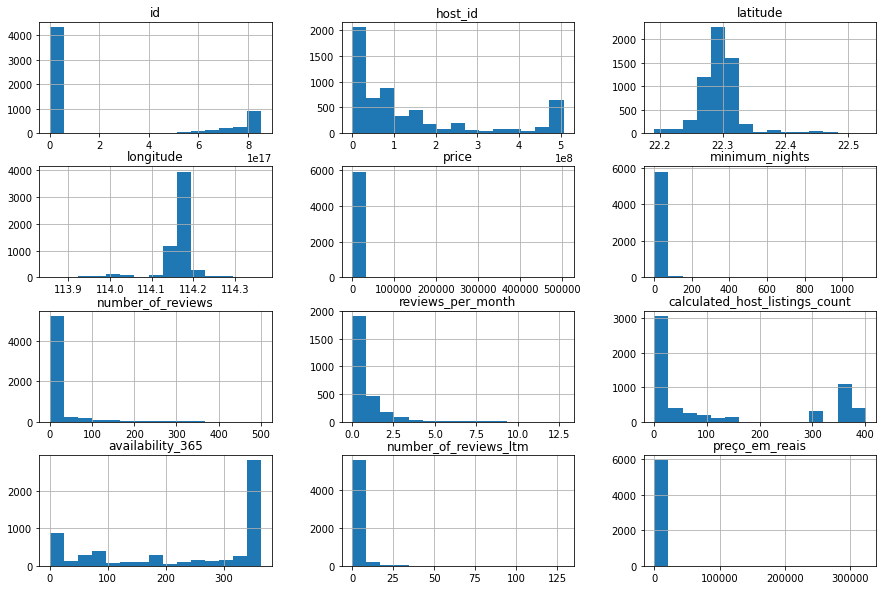

In [15]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Tratando os *outliers* presentes**

Observando a distribuição do histograma, é possível notar sinais de possíveis outliers nas variáveis `price` (e consequentemente `preço_em_reais`) e `minimum_nights`.

Valores outliers podem distorcer totalmente a representação gráfica e afetar bruscamente a média, levando a uma interpretação equivocada sobre a variável analisada.

Para ter uma noção melhor sobre as variáveis e confirmar a existência desses outliers vamos: 

*   utilizar o método `describe()` para um resumo estatístico das variáveis numéricas.
*   Plotar boxplots a variável.




In [16]:
# resumo estatístico das variáveis numéricas
df[['price', 'preço_em_reais', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,preço_em_reais,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5936.000000,5936.000000,5936.000000,5936.000000,2730.000000,5936.000000,5936.000000
mean,879.012635,565.205030,21.464117,15.182615,0.760462,126.691038,238.455863
std,7111.654806,4572.794018,36.939812,43.885790,1.064055,159.037097,144.095086
min,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,180.000000,115.740000,1.000000,0.000000,0.120000,3.000000,87.000000
50%,400.000000,257.200000,28.000000,0.000000,0.370000,25.000000,328.500000
75%,788.000000,506.680000,29.000000,6.000000,1.000000,362.000000,364.000000
max,503211.000000,323564.670000,1125.000000,501.000000,12.770000,401.000000,365.000000


Analisando o resumo acima, podemos notar que:



*   `preço_em_reais` possui o valor máximo de 323564,64 reais. Sendo que 75% dos preços são iguais ou inferiores a 788 reais resultando em um desvio-padrão de 4572,79. Conclui-se que esssa variável possui outliers visto a discrepancia dos valores. 
*  `minimum_nights` possui um máximo de 1125, ou seja, uma quantidade mínima de noites superior a 365 dias (um ano). Não há possibilidade de o mínimo de noites exigido para reserva de um imóvel chegar a essa quantidade. Conclui-se que essa variável possui outliers.


A imagem a seguir apresenta informações sobre o boxplot:

<img src = https://5ce827599a409a488a3c361c.static-01.com/l/images/75d0447007b5465fb468292b68eadeb7733dcd46.png>

Na construção de um boxplot é realizado alguns cálculos onde é definido um `limite superior (máximo)` e `limite inferior (mínimo)` onde os valores que ultrapassam esses limites são considerados outliers baseando-se nos dados do dataset.


Seguindo essa linha de raciocínio, vamos utilizar o cálculo do `limite superior` para, através desse valor, eliminar valores que ultrapassam esse limite.

Como podemos ver na figura, o cálculo para o `limite superior` é: 

<h1><strong>Limite superior =  Q3 + 1,5 * IQ</strong></h1>

onde `IQ` é a `distância interquartílica` e seu calculo é:

<h1><strong>IQ = Q3-Q1</strong></h1>
 
sendo essa a distância entre o `terceiro quartil (Q3)` e o `primeiro quartil (Q1)`.

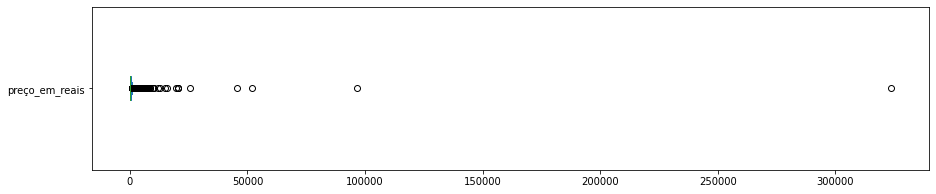


Limite superior de preço: 1093.09
Quantidade de valores acima do limite: 473
Representam 7.97% do dataset


In [17]:
# identificando os valores outliers de preço_em_reais
df.preço_em_reais.plot(kind="box", vert=False, figsize = (15, 3))
plt.show()


Q1 = df.preço_em_reais.quantile(.25) # obtendo primeira quartil
Q3 = df.preço_em_reais.quantile(.75) # obtendo terceiro quartil

# calculando a distância interquatílica
IQ = Q3 - Q1

# calculando o limite superior
limite_sup_preço = Q3 + 1.5 * IQ

print(f"\nLimite superior de preço: {limite_sup_preço:.2f}")

# quantidade de valores que estão acima desse limite:
print(f"Quantidade de valores acima do limite: {len(df[df.preço_em_reais > limite_sup_preço])}")

# calculando a porcentagem de valores que estão acima desse limite
print(f"Representam {(len(df[df.preço_em_reais > limite_sup_preço]) / df.shape[0]) * 100:.2f}% do dataset")

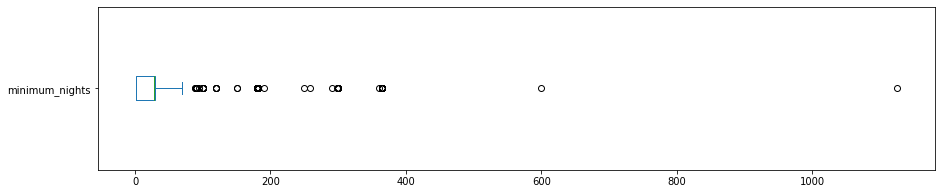


Limite superior de minimum_nights: 71.0
Quantidade de valores acima do limite: 1
Representam 2.36% do dataset


In [18]:
# identificando os valores outliers de minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize = (15, 3))
plt.show()


Q1 = df.minimum_nights.quantile(.25) # obtendo primeira quartil
Q3 = df.minimum_nights.quantile(.75) # obtendo terceiro quartil

# calculando a distância interquatílica
IQ = Q3 - Q1

# calculando o limite superior
limite_sup_minimum_nights = Q3 + 1.5 * IQ

print(f"\nLimite superior de minimum_nights: {limite_sup_minimum_nights}")

# quantidade de valores que estão acima desse limite:
print(f"Quantidade de valores acima do limite: {len(df[df.minimum_nights > limite_sup_preço])}")

# calculando a porcentagem de valores que estão acima desse limite
print(f"Representam {(len(df[df.minimum_nights > limite_sup_minimum_nights]) / df.shape[0]) * 100:.2f}% do dataset")

**Obs:** não utilizarei o limite inferior pois, como pode ser observado nos boxplots que foram gerados, os valores outliers estão em sua grande maioria acima do limite superior.

In [19]:
# removendo os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.preço_em_reais > limite_sup_preço].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > limite_sup_minimum_nights].index, axis=0, inplace=True)

# removendo valores zerados
df_clean.drop(df_clean[df_clean.preço_em_reais == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights == 0].index, axis=0, inplace=True)

#### Visualizando as variáveis com os *outliers* tratados

Vamos agora checar como se encontram os dados após o tratamento plotando novamente um `histograma`, boxplots e chamando o método `describe()`.

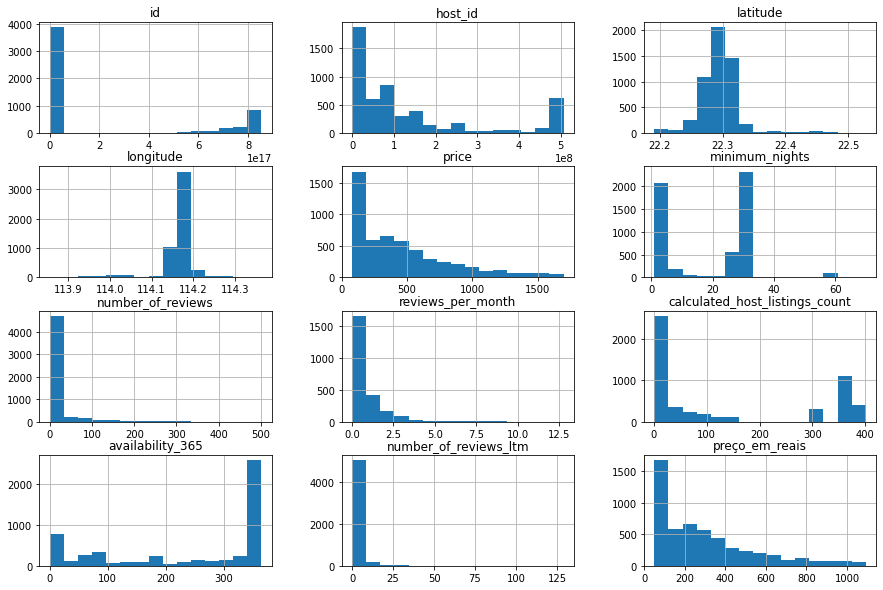

In [20]:
# plotando o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [21]:
# resumo estatístico das variáveis numéricas
df_clean[['price', 'preço_em_reais', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,preço_em_reais,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5332.000000,5332.000000,5332.000000,5332.000000,2393.000000,5332.000000,5332.000000
mean,475.268380,305.597457,18.033758,14.930045,0.774246,139.261440,240.768380
std,362.492005,233.082397,14.383458,43.152504,1.079716,162.534303,144.048747
min,79.000000,50.800000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,180.000000,115.740000,1.000000,0.000000,0.120000,4.000000,87.750000
50%,360.000000,231.480000,28.000000,0.000000,0.380000,35.000000,333.000000
75%,639.000000,410.880000,29.000000,5.000000,1.000000,362.000000,364.000000
max,1699.000000,1092.460000,70.000000,501.000000,12.770000,401.000000,365.000000


#### Boxplot para preço_em_reais

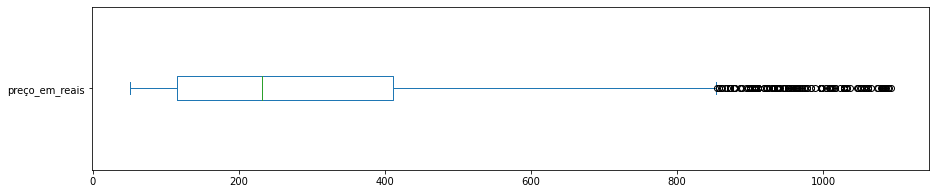

In [22]:
# preço_em_reais
df_clean.preço_em_reais.plot(kind="box", vert=False, figsize = (15, 3))
plt.show()

#### Boxplot para minimum_nights

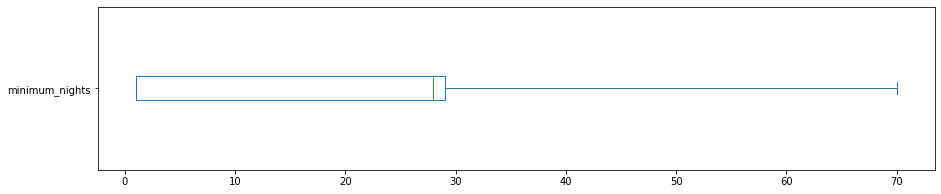

In [23]:
# minimum_nights
df_clean.minimum_nights.plot(kind="box", vert=False, figsize = (15, 3))
plt.show()

Ao observar o histograma e o resumo estatístico podemos chegar a algumas conclusões:




*   O boxplot de `preço_em_reais` ainda possui alguns outliers. Porém, os dados que foram excluídos foi respeitando a regra do 1,5*IQ. Já em `minimum_nights` percebe-se que os outliers foram eliminados completamente.
*   As variáveis não tiveram muitas mudanças na mediana.
*   A média dos preços diminuiu quase pela metade. O que faz sentido já que os valores outliers estavam influenciando consideralmente no resultado.
*   O desvio-padrão diminuiu consideravelmente o que indica que a variação dos dados agora é mais consistente e menos influenciada pelos valores extremos.







### **Q4. Qual a média dos preços de aluguel em Hong Kong?**

In [24]:
# Retornando a média dos preços de aluguel
print(f"Média do aluguel em HK$: {df_clean.price.mean():.2f}")
print(f"Média do aluguel em R$: {df_clean.preço_em_reais.mean():.2f}")

Média do aluguel em HK$: 475.27
Média do aluguel em R$: 305.60


A média dos preços de aluguel em Hong Kong é de 475,27 dolares de Hong Kong, o equivalente a 305,60 reais

### **Q4. Qual a correlação existente entre as variáveis**

A matriz de correlação mostra a correlação entre as variáveis do dataset. Os valores de correlação podem variar de 1 a -1, onde quanto :

valores positivos: quanto mais proximo de 1 indica que as variáveis são diretamente proporcionais, ou seja, quando uma variável aumenta, a outra também aumenta na mesma proporção. 

valores negativos: quanto mais proximo de -1 indica que as variáveis são inversamente proporcionais, ou seja, quando uma variável aumenta, a outra diminui na mesma proporção.

In [25]:
# criando a matriz de correlação
corr = df_clean[['price', 'preço_em_reais' ,'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,preço_em_reais,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,1.000000,-0.394798,0.123016,0.076957,-0.599481,-0.315201
preço_em_reais,1.000000,1.000000,-0.394798,0.123016,0.076957,-0.599481,-0.315201
minimum_nights,-0.394798,-0.394798,1.000000,-0.309075,-0.235128,0.632046,0.475010
number_of_reviews,0.123016,0.123016,-0.309075,1.000000,0.626373,-0.271043,-0.214325
reviews_per_month,0.076957,0.076957,-0.235128,0.626373,1.000000,-0.198723,-0.078090
calculated_host_listings_count,-0.599481,-0.599481,0.632046,-0.271043,-0.198723,1.000000,0.534821
availability_365,-0.315201,-0.315201,0.475010,-0.214325,-0.078090,0.534821,1.000000


As variáveis `price` e `preço_em_reais`possuem valor 1 de correlação pois como um é a conversão do outro os valores estão exatamente na mesma proporção.

Dessa forma, vamos excluir a coluna `price` da correlação e manter somente o `preço_em_reais` para facilitar a visualização.

In [26]:
corr = df_clean[['preço_em_reais' ,'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365']].corr()
corr

,preço_em_reais,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
preço_em_reais,1.000000,-0.394798,0.123016,0.076957,-0.599481,-0.315201
minimum_nights,-0.394798,1.000000,-0.309075,-0.235128,0.632046,0.475010
number_of_reviews,0.123016,-0.309075,1.000000,0.626373,-0.271043,-0.214325
reviews_per_month,0.076957,-0.235128,0.626373,1.000000,-0.198723,-0.078090
calculated_host_listings_count,-0.599481,0.632046,-0.271043,-0.198723,1.000000,0.534821
availability_365,-0.315201,0.475010,-0.214325,-0.078090,0.534821,1.000000


Agora vamos exibir essa mesma matriz só que com uma visualização mais amigável utilizando o método heatmap do `seaborn`

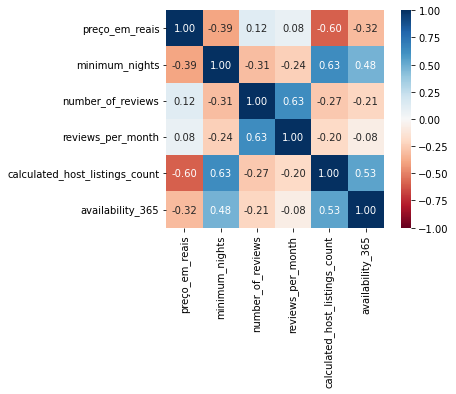

In [27]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, vmax = 1, vmin= -1);

Observando os valores do heatmap podemos chegar em algumas conclusões:

*   A variável `calculated_host_listings_count` possui correlação com a variável `preço_em_reais` de -0.60 o que pode indicar que quanto maior a quantidade de anuncios de um imóvel, menor é o seu preço e vice versa.
*  A variável `availability_365` tem uma certa correlação diretamente proporcional com a variável `minimum_nights` podendo indicar que quanto maior o número de noites mínimas para reserva maior é a quantidade de dias que o imóvel está disponível para reserva.

Vale ressaltar que analisar essas correlações somente pela matriz de correlação pode ser perigoso, visto que a correlação não implica causalidade. A correlação indica a presença de uma relação estatística entre duas variáveis, mas não significa necessariamente que uma causa a outra. É possível que a relação observada seja influenciada por outras variáveis não incluídas na análise.

Além disso, as relações podem ser mais complexas do que parecem. Vale utilizar outros métodos para confirmar as correlações ou entender melhor as relações entre as variáveis.





### **Q5. Qual o tipo de imóvel mais alugado em Hong Kong no Airbnb?**

No site do Airbnb é possível alugar diferentes tipos de imóveis como casas inteiras, apartamentos, quartos privados ou até mesmo compartilhado com outras pessoas.

Para saber qual o tipo mais alugado vamos visualizar em um histograma e mostrar a quantidade exata de cada tipo de imóvel disponível.

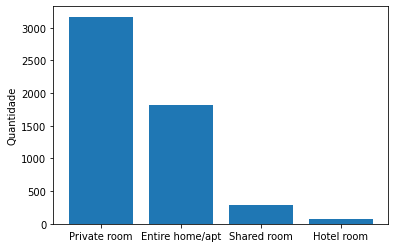

In [28]:
# mostrar a quantidade de cada tipo de imóvel disponível
tipos_imovel = ['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']

plt.bar(tipos_imovel, df_clean.room_type.value_counts(), 0.8)
plt.xticks(tipos_imovel)
plt.ylabel("Quantidade")

# exibe o gráfico

plt.show()


In [29]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       3170
Entire home/apt    1813
Shared room         282
Hotel room           67
Name: room_type, dtype: int64

In [30]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] * 100

Private room       59.452363
Entire home/apt    34.002251
Shared room         5.288822
Hotel room          1.256564
Name: room_type, dtype: float64

Observações:

*  O `quarto compartilhado` é o tipo mais anunciado no airbnb com 59,45% de  frequência no dataset e logo depois as `casas inteira e apartamentos` com 34%.
*   Os `Quartos de hoteis` são os menos anunciados, com um total de 1,25% dos anuncios.


Podemos concluir que o imóvel mais alugado em Hong Kong no airbnb são os `quartos privados`.

### **Q6. Qual a localidade mais cara do dataset?**



Para ter uma ideia das localidades mais caras de Hong Kong vamos calcular a média dos preços agrupado pela localidade utilizando método `groupby()`.

Esse método é eficiente para calcular uma variável em função de outra.

In [31]:
# média de preços por localidade
df_clean.groupby(['neighbourhood']).preço_em_reais.mean().sort_values(ascending=False)

neighbourhood
Wong Tai Sin         673.178000
Islands              525.879321
Sai Kung             482.684366
Tai Po               471.415000
Yuen Long            460.212273
Tsuen Wan            421.757692
Kwai Tsing           409.912500
Kwun Tong            380.197143
Tuen Mun             372.912174
Sha Tin              335.037297
Central & Western    326.096319
Yau Tsim Mong        285.538296
Eastern              279.008571
Wan Chai             271.605127
Kowloon City         259.212297
Sham Shui Po         247.223897
Southern             223.752966
North                220.549000
Name: preço_em_reais, dtype: float64

Ao agrupar, vemos que o bairro Wong Tai Sin possui a maior média de preços. Logo, seria intuitivo dizer que é a região mais cara de Hong Kong.

Porém, é possível que esse cálculo esteja enviesado dependendo da quantidade de amostras que está sendo observado.

Vamos verificar a quantidade de amostras das 5 localidades mais caras segundo o que foi retornado pelo método `groupby()` que fizemos anteriormente.

In [32]:
localidades = ['Wong Tai Sin', 'Islands', 'Sai Kung', 'Tai Po', 'Yuen Long']
for localidade in localidades:
  print('{}: {} imóveis'.format(localidade, df_clean[df_clean.neighbourhood==localidade].shape[0]))

Wong Tai Sin: 15 imóveis
Islands: 265 imóveis
Sai Kung: 71 imóveis
Tai Po: 20 imóveis
Yuen Long: 44 imóveis


In [33]:
# Verificando os imóveis de Wong Tai Sin
df_clean[['neighbourhood', 'name', 'preço_em_reais']][df_clean.neighbourhood=='Wong Tai Sin']

,neighbourhood,name,preço_em_reais
217,Wong Tai Sin,Flat Share in Sham Shui Po,115.74
892,Wong Tai Sin,與房東同住，互動。5分鐘到達黃大仙港鐵站。光亮，整潔私人房間,192.90
2239,Wong Tai Sin,景觀開揚studio flat,257.20
3292,Wong Tai Sin,Tropical & kids friendly house,1047.45
4287,Wong Tai Sin,"Renovated 3 bedroom with Playground, Gym, & more",643.00
5035,Wong Tai Sin,500尺，2房，廳＋廁所，廚房（新裝修）交通方便，可步行\n到：黃大仙，樂富，啟德，宋皇\n...,450.10
5078,Wong Tai Sin,Metaplace 高級城景雙人房#3 香港銅鑼灣名迪港島酒店,844.26
5248,Wong Tai Sin,有會所室內泳池的高檔公寓臥室（元朗西鐵站）,211.55
5316,Wong Tai Sin,Metaplace 高級城景雙人房#4 香港銅鑼灣名迪港島酒店,844.26
5317,Wong Tai Sin,Metaplace 高級城景雙人房#5 香港銅鑼灣名迪港島酒店,844.26


Para verificar se os dados estão enviesados, vamos verificar a mediana de `Wong Tai Sin`, ou seja, o valor em que pelo menos 50% dos imóveis possui igual ou menor, e fazer uma comparação com as duas outras localidades mais caras.

In [34]:
# verificando a mediana dos preços de Wong Tai Sin
df_clean[['preço_em_reais']][df_clean.neighbourhood=='Wong Tai Sin'].quantile(.50)

preço_em_reais    844.26
Name: 0.5, dtype: float64

In [35]:
# Verificando a porcentagem de amostras com preço superior a 844 reais Wong Tai Sin
df_wongTaiSin = df_clean[df_clean.neighbourhood=='Wong Tai Sin']
print(f'{df_wongTaiSin[df_wongTaiSin.preço_em_reais>=844].shape[0] / df_wongTaiSin.shape[0] *100}% dos imóveis custam 844 reias ou mais')
print(f'O equivalente a{df_wongTaiSin[df_wongTaiSin.preço_em_reais>=844].shape[0] / df_wongTaiSin.shape[0] * df_wongTaiSin.shape[0]: 0.0f} imóveis')

60.0% dos imóveis custam 844 reias ou mais
O equivalente a 9 imóveis


In [36]:
# Verificando a porcentagem de amostras com preço superior a 844 reais em Islands
df_islands = df_clean[df_clean.neighbourhood=='Islands']
print(f'{df_islands[df_islands.preço_em_reais>=844].shape[0] / df_islands.shape[0] *100}% dos imóveis custam 844 reias ou mais')

print(f'O equivalente a{df_islands[df_islands.preço_em_reais>=844].shape[0] / df_islands.shape[0] * df_islands.shape[0]: 0.0f} imóveis')

9.811320754716983% dos imóveis custam 844 reias ou mais
O equivalente a 26 imóveis


In [37]:
# Verificando a porcentagem de amostras com preço superior a 844 reais em Sai Kung
df_saiKung = df_clean[df_clean.neighbourhood=='Sai Kung']
print(f'{df_saiKung[df_saiKung.preço_em_reais>=844].shape[0] / df_saiKung.shape[0] *100}% dos imóveis custam 844 reias ou mais')

print(f'O equivalente a{df_saiKung[df_saiKung.preço_em_reais>=844].shape[0] / df_saiKung.shape[0] * df_saiKung.shape[0]: 0.0f} imóveis')

16.901408450704224% dos imóveis custam 844 reias ou mais
O equivalente a 12 imóveis


In [38]:
df_islands = df_clean[df_clean.neighbourhood=='Islands']
print(f'{df_islands[df_islands.preço_em_reais>=844].shape[0] / df_islands.shape[0] *100}% dos imóveis custam 844 reias ou mais')

print(f'O equivalente a{df_islands[df_islands.preço_em_reais>=844].shape[0] / df_islands.shape[0] * df_islands.shape[0]: 0.0f} imóveis')

9.811320754716983% dos imóveis custam 844 reias ou mais
O equivalente a 26 imóveis


#### Verificando a porcentagem de amostras com preço superior a 844 reais em Islands


In [39]:
localidades = ['Wong Tai Sin', 'Islands', 'Sai Kung', 'Tai Po', 'Yuen Long']
for localidade in localidades:
  print('{}: mediana = {} '.format(localidade, df_clean[['preço_em_reais']][df_clean.neighbourhood==localidade].quantile(.75)))

Wong Tai Sin: mediana = preço_em_reais    907.27
Name: 0.75, dtype: float64 
Islands: mediana = preço_em_reais    643.0
Name: 0.75, dtype: float64 
Sai Kung: mediana = preço_em_reais    687.045
Name: 0.75, dtype: float64 
Tai Po: mediana = preço_em_reais    642.0325
Name: 0.75, dtype: float64 
Yuen Long: mediana = preço_em_reais    643.0
Name: 0.75, dtype: float64 


Analisando os dados acima podemos concluir que:


*   `Wong Tai Sin` possui uma quantidade de amostras muito inferior as demais localidades com somente 15 imóveis para observação. O preço de seus imóveis é igual ou inferior a 844 reais em 50% dos dados e a média dos preços é de 673 reais
*   `Islands` possui uma boa quantidade de amostras, com um número de 265 imóveis para observação e sua média de preços é 525 reais.
*   9 imóveis de `Wong Tai Sin` possui valor igual ou superior a 844 reais, enquanto `Islands` possui 26 imóveis sobre esta condição.

#### Porque em Wong Tai Sin a média é mais alta?

<center><b>O TEMPLO WONG TAI SIN</b></center>

<center><img alt="Templo Wong Tai Sin" width="70%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/HK_WongTaiSinTemple.JPG/1280px-HK_WongTaiSinTemple.JPG"></center>

Uma possível resposta para essa pergunta é devido a um conhecido santuário e atração turística em Hong Kong, O Templo Wong Tai Sin. 

O templo, lar do taoísmo, budismo e confucionismo, presta uma homenagem ao lendário monge Wong Tai Sin, a quem os fiéis honram por meio das oferendas e pedem fortuna através das artes adivinhatórias.

Ele é um dos templos mais populares de Hong Kong, atraindo muitos visitantes locais e estrangeiros todos os dias. Esse é um forte indício para os custos das diárias nessa região serem mais altos.

fonte: https://www.tudosobrehongkong.com/templo-wong-tai-sin

#### Visualizando a localização das regiões mais caras de Hong Kong

O dataset fornece as latitudes e longitudes de todos os imóveis e isso nos permite plotar cada ponto. 

Para visualização, vamos plotar cada imóvel e atribuir uma escala de coloração dependendo do seu preço. Considerando `x=longitude`e `y=latitude`

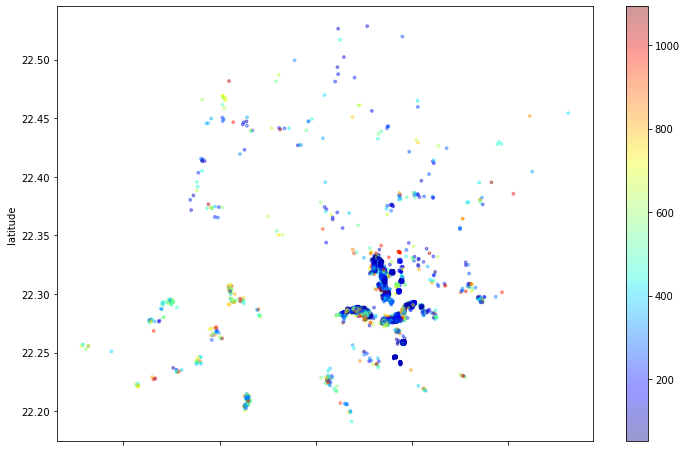

In [40]:
# plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['preço_em_reais'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Vamos visualizar no mapa a localidade dos imóveis nas 5 localidades mais caras de Hong Kong.

In [41]:
df_clean.longitude

0       114.154310
1       114.149880
2       114.150540
3       114.131680
4       114.176990
           ...    
5931    114.160435
5932    114.168175
5933    113.982574
5934    114.141919
5935    114.162114
Name: longitude, Length: 5332, dtype: float64

In [ ]:
# Selecionando somente os imóveis que pertencem as localidades mais caras: ['Wong Tai Sin', 'Islands', 'Sai Kung', 'Tai Po', 'Yuen Long']
data_plot = df_clean[df_clean['neighbourhood'].isin(localidades)]

# Comando para desenhar o mapa com a localidade padrão em lat=22.40 e long=113.95
mapa = folium.Map(location=[22.40, 113.95], zoom_start=11)

# Designando os pontos de latitude e longitude no mapa
for index, location_info in data_plot.iterrows():

    #Ao clicar no imóvel é apresentado o nome da localidade e o preço em reais do mesmo
    folium.Marker([location_info['latitude'], location_info['longitude']],
                  popup=location_info[['neighbourhood', 'preço_em_reais']]).add_to(mapa)
    
mapa

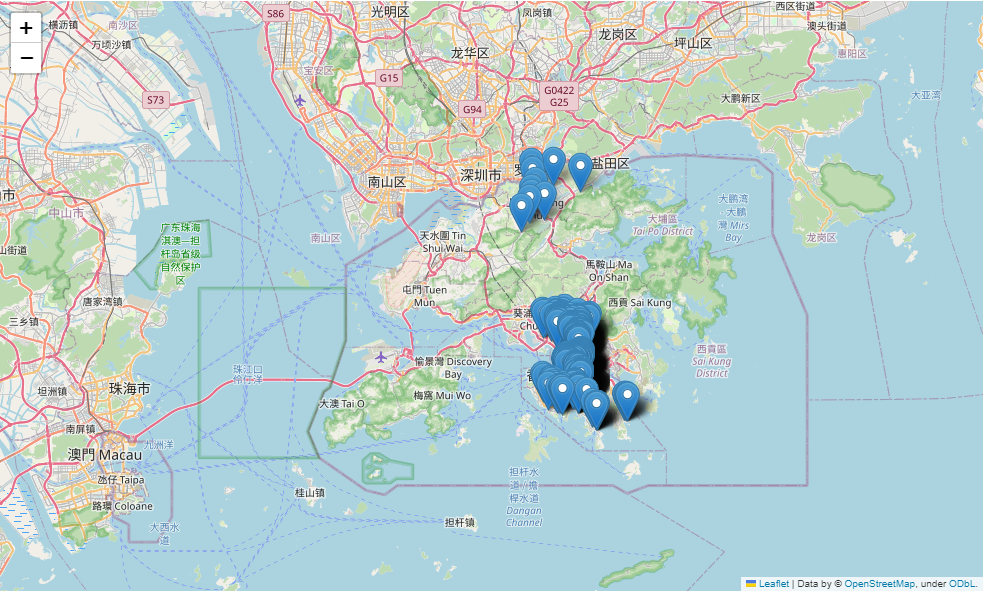

### **Q6. Qual a localidade mais barata de Hong Kong?**

Vamos seguir a mesma lógica da questão anterior, mas agora, ordenando as médias dos preços do mais barato ao mais caro.

In [43]:
df_clean.groupby(['neighbourhood']).preço_em_reais.mean().sort_values(ascending=True)

neighbourhood
North                220.549000
Southern             223.752966
Sham Shui Po         247.223897
Kowloon City         259.212297
Wan Chai             271.605127
Eastern              279.008571
Yau Tsim Mong        285.538296
Central & Western    326.096319
Sha Tin              335.037297
Tuen Mun             372.912174
Kwun Tong            380.197143
Kwai Tsing           409.912500
Tsuen Wan            421.757692
Yuen Long            460.212273
Tai Po               471.415000
Sai Kung             482.684366
Islands              525.879321
Wong Tai Sin         673.178000
Name: preço_em_reais, dtype: float64

Verificando a quantidade de amostras das 5 primeiras localidades

In [44]:
localidades = ['North', 'Southern', 'Sham Shui Po', 'Kowloon City', 'Wan Chai'] 
for localidade in localidades: 
  print('{}: {} imóveis'.format(localidade, df_clean[df_clean.neighbourhood==localidade].shape[0]))

North: 10 imóveis
Southern: 118 imóveis
Sham Shui Po: 136 imóveis
Kowloon City: 209 imóveis
Wan Chai: 1178 imóveis


In [45]:
df_clean[['neighbourhood', 'name', 'preço_em_reais']][df_clean.neighbourhood=='North']

,neighbourhood,name,preço_em_reais
1510,North,Relaxed and comfortable,247.56
1545,North,@Terry's,141.46
3877,North,Tiger Farm By Carpus & Co Car Camping Site,443.67
4183,North,Studio Long Term Let only (Unavailable Now),210.90
4571,North,House with countryside view 元朗別墅獨立套房 A2,404.45
4998,North,獨立套房，可煮飯，有冰箱，洗衣機，電視，獨立廚衛，冷氣 等，近巴士站,122.17
5255,North,Experience a country life with garden & farm i...,185.18
5277,North,Heart of Sheung Shui - long term tenant wanted,160.75
5529,North,Cosy Quiet Village Room A,160.75
5903,North,Cosy Quiet Village Room B,128.60


In [46]:
# verificando a mediada dos preços de North
df_clean[['preço_em_reais']][df_clean.neighbourhood=='North'].quantile(.50)

preço_em_reais    172.965
Name: 0.5, dtype: float64

In [47]:
# Verificando a porcentagem de amostras com preço inferior a 172 reais nas 5 localidades mais baratas.
localidades_baratas = ['North', 'Southern', 'Sham Shui Po', 'Kowloon City', 'Wan Chai']

for local in localidades_baratas:
  df_aux = df_clean[df_clean.neighbourhood==local]
  print(f'{df_aux[df_aux.preço_em_reais<=172].shape[0] / df_aux.shape[0] *100: 0.2f}% dos imóveis custam 172 reias ou menos em', local)
  print(f'O equivalente a{df_aux[df_aux.preço_em_reais<=172].shape[0] / df_aux.shape[0] * df_aux.shape[0]: 0.0f} imóveis\n')

 50.00% dos imóveis custam 172 reias ou menos em North
O equivalente a 5 imóveis

 73.73% dos imóveis custam 172 reias ou menos em Southern
O equivalente a 87 imóveis

 64.71% dos imóveis custam 172 reias ou menos em Sham Shui Po
O equivalente a 88 imóveis

 63.64% dos imóveis custam 172 reias ou menos em Kowloon City
O equivalente a 133 imóveis

 51.61% dos imóveis custam 172 reias ou menos em Wan Chai
O equivalente a 608 imóveis



In [48]:
# Verificando o resumo estatístico de Wan Chai
df_clean[['preço_em_reais']][df_clean.neighbourhood=='Wan Chai'].describe()

,preço_em_reais
count,1178.000000
mean,271.605127
std,233.364378
min,70.730000
25%,102.880000
50%,157.540000
75%,356.057500
max,1080.240000


In [ ]:
# Selecionando somente os imóveis que pertencem as localidades mais caras: ['North', 'Southern', 'Sham Shui Po', 'Kowloon City', 'Wan Chai']
data_plot = df_clean[df_clean['neighbourhood'].isin(localidades_baratas)]

# Comando para desenhar o mapa com a localidade padrão em lat=22.40 e long=113.95
mapa = folium.Map(location=[22.40, 113.95], zoom_start=11)

# Designando os pontos de latitude e longitude no mapa
for index, location_info in data_plot.iterrows():

    #Ao clicar no imóvel é apresentado o nome da localidade e o preço em reais do mesmo
    folium.Marker([location_info['latitude'], location_info['longitude']],
                  popup=location_info[['neighbourhood', 'preço_em_reais']]).add_to(mapa)
    
mapa

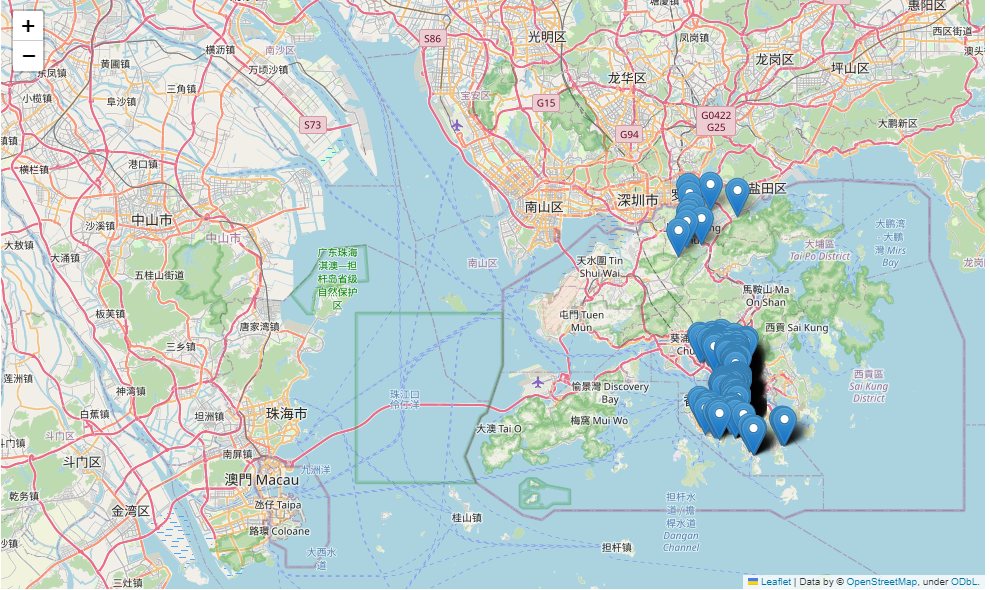

Podemos concluir que:


*   `North` possui a menor média de preços, mas possuindo apenas 10 amostras de imóveis.
*   `Southern` possui 73% de seus imóveis com valor menor ou igual a mediana de `North`, um total de 87 imóveis.
*   51% dos imóveis de `Wan Chai` possui preços inferiores a mediana de `North`, o equivalente a 608 imóveis, possuindo mais disponibilidade de imóveis baratos. Porém, devido a sua grande quantidade de imóveis também há preços caros podendo chegar até 1080 reais a diária.





#### Porque North é a região mais barata?

<center><b>North District</b></center>

<center><img alt="Templo Wong Tai Sin" width="80%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Long_Valley_Overview_201408.jpg/1280px-Long_Valley_Overview_201408.jpg"></center>

Em North District de Hong Kong, você encontrará aldeias muradas chinesas de centenas de anos a apenas alguns minutos de prédios residenciais públicos do pós-guerra. 

Embora a maior parte do distrito seja acessível via MTR e pela excelente rede de ônibus públicos de Hong Kong, esta é uma área especialmente gratificante para explorar a pé. Existem estradas e caminhos para todos os tipos e níveis de caminhada, quer você prefira caminhar de vila em vila, ou embarcar em uma caminhada desafiadora ao longo de colinas escarpadas em um parque rural.

A sua pequena quantidade de amostras de anúncios de imóveis e os baixos preços das diárias podem estar relacionados a North ser uma região pouco urbanizada e mais rural.

fonte: https://www.discoverhongkong.com/in/explore/neighbourhoods/north.html

### **Q7. Qual a média de mínimo de noites para alugar um imóvel?**

In [50]:
df_clean['minimum_nights'].mean()

18.0337584396099

A média do mínimo de noites em um imóvel em Hong Kong é equivalente a aproximadamente 18 dias, o que indica que as pessoas costumam ficar em um imóvel de Hong Kong durante mais da metade de um mês.

## Conclusões



*   Foi realizado uma análise exploratória dos dados onde foi possível identificar outliers em alguns atributos.
*   Foi feito a limpeza de valores nulos, inválidos e redução de outliers, deixando o dataset mais limpo e pronto para ser aplicado em um algoritmo de machine learning.
*   Foi possível fazer análises interessantes dos dados como as médias de preços por localidade, mais baratos e mais caros e a visualização dos mesmos em um mapa.
*   Com a análise realizada foi possível oferecer uma visão mais ampla sobre o que esperar dos imóveis em Hong Kong para quem pensa em visitar essa cidade.
*   Para informações mais precisas, seria interessante, como trabalho futuro, realizar a análise exploratória nos dados completos, já que este utilizado nesse projeto foi a versão resumida ótimo para uma abordagem inicial.












